In [2]:
# Dependências
from github import Github
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from collections import Counter
import re

In [3]:
# Create a Github instance:
g = Github("<github_token>")

# Find my user
user = g.get_user()

#print(user.name)

# Find the organization I want
org = g.get_organization("fga-eps-mds")



# Get all repos from my account, including from organizations
repos = org.get_repos()


# Get the repo, either from user or organization, uncomment the repo you want. (Only one repo can be uncommented)
repo = org.get_repo("2019.2-Acacia")


pattern = re.compile("^(2019\.2).+$")
chosen_repos = []
for repo in repos:
    if pattern.match(repo.name):
        chosen_repos.append(repo)
        print(repo.name)
    

2019.2-Acacia
2019.2-Questmark
2019.2-Vsign
2019.2-Gymnasteg-Wiki
2019.2-FoodCare
2019.2-Grupo2
2019.2-Git-Breakdown
2019.2-Amika-Wiki
2019.2-ArBC
2019.2-GloriaBot
2019.2-DashboardAgil-Wiki
2019.2-Grupo13
2019.2-Amika-Backend
2019.2-FoodCare-WebApp
2019.2-Gymnasteg-Backend
2019.2-ArBC-API
2019.2-Gymnasteg-Frontend
2019.2-Acacia-Frontend
2019.2-Grupo2-Backend
2019.2-Amika-Frontend
2019.2-DashboardAgil


############## 2019.2-Acacia ##############
Média de dias em aberto: 2.263157894736842


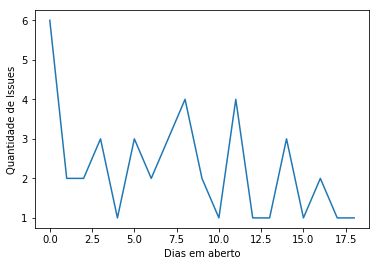

############## 2019.2-Questmark ##############
Média de dias em aberto: 2.3333333333333335


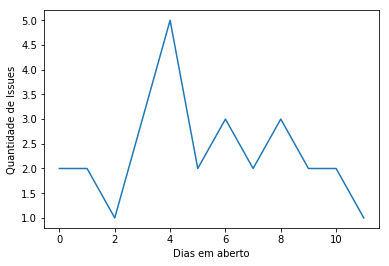

############## 2019.2-Vsign ##############
Média de dias em aberto: 3.0588235294117645


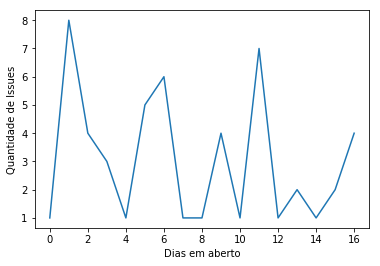

############## 2019.2-Gymnasteg-Wiki ##############
Média de dias em aberto: 3.1176470588235294


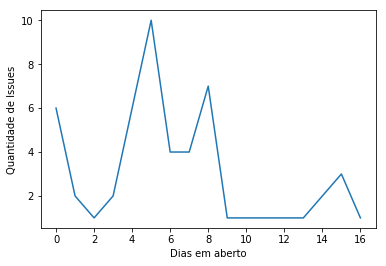

############## 2019.2-FoodCare ##############
Média de dias em aberto: 4.333333333333333


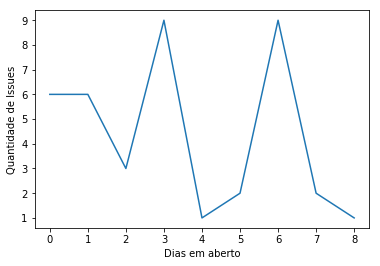

############## 2019.2-Grupo2 ##############
Média de dias em aberto: 3.1538461538461537


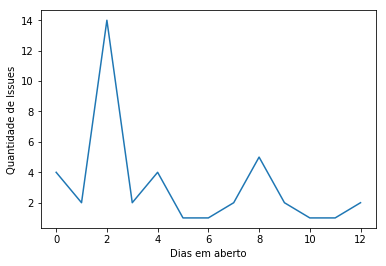

############## 2019.2-Git-Breakdown ##############
Média de dias em aberto: 2.111111111111111


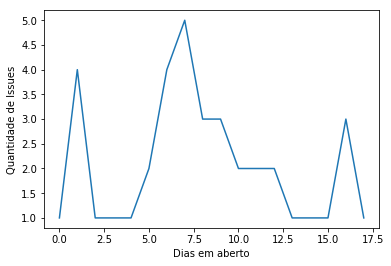

############## 2019.2-Amika-Wiki ##############
Média de dias em aberto: 3.1333333333333333


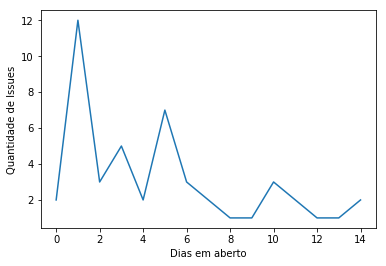

############## 2019.2-ArBC ##############
Média de dias em aberto: 2.2857142857142856


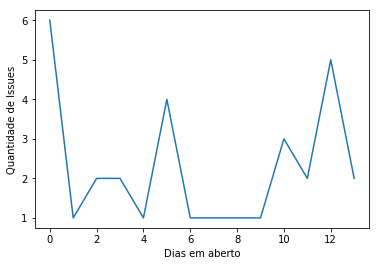

############## 2019.2-GloriaBot ##############
Média de dias em aberto: 2.4285714285714284


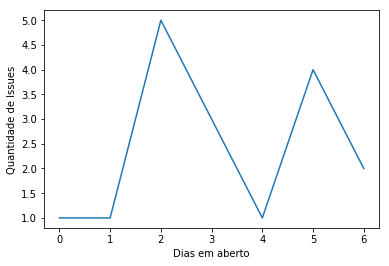

############## 2019.2-DashboardAgil-Wiki ##############
Média de dias em aberto: 4.0


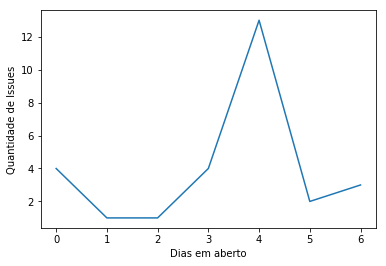

############## 2019.2-Grupo13 ##############
Média de dias em aberto: 1.8


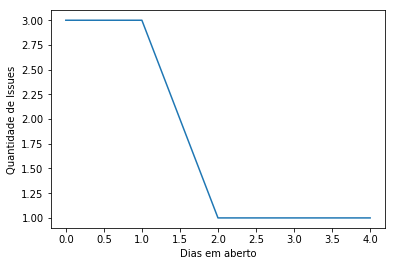

############## 2019.2-Amika-Backend ##############
Média de dias em aberto: 1.5


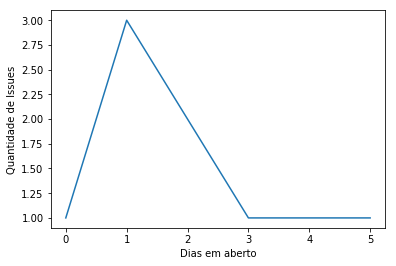

############## 2019.2-FoodCare-WebApp ##############
Média de dias em aberto: 1.0


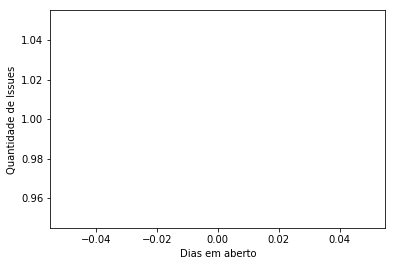

############## 2019.2-Gymnasteg-Backend ##############
Média de dias em aberto: 1.0


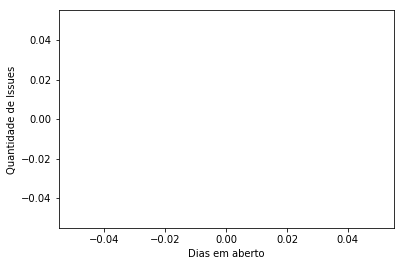

############## 2019.2-ArBC-API ##############
Média de dias em aberto: 1.3333333333333333


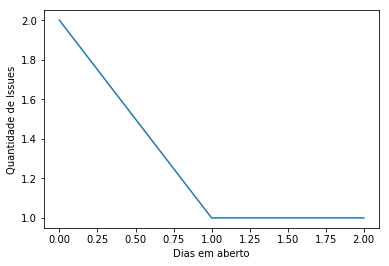

############## 2019.2-Gymnasteg-Frontend ##############
Média de dias em aberto: 1.3333333333333333


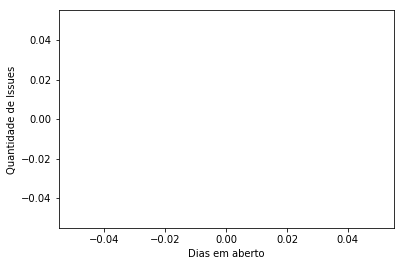

############## 2019.2-Acacia-Frontend ##############
Média de dias em aberto: 1.3333333333333333


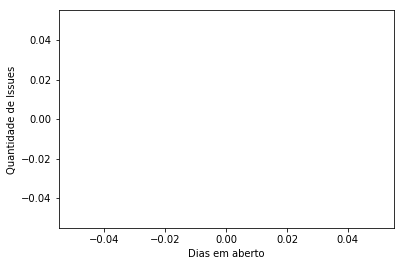

############## 2019.2-Grupo2-Backend ##############
Média de dias em aberto: 1.3333333333333333


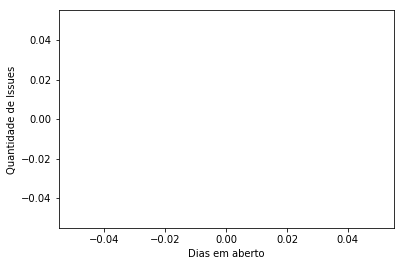

############## 2019.2-Amika-Frontend ##############
Média de dias em aberto: 1.5


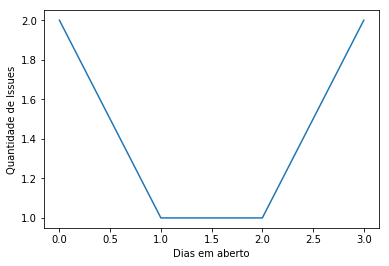

############## 2019.2-DashboardAgil ##############
Média de dias em aberto: 1.5


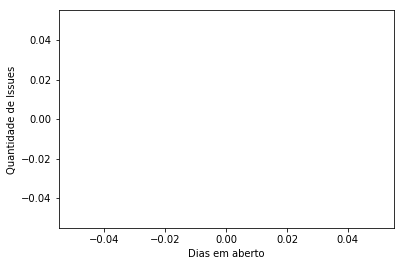

In [6]:
# pega todas as issues do repositório 
for repo in chosen_repos:
    print("##############",repo.name, "##############")
    issues = repo.get_issues(state="all")
    all_issues = []
    time_open = Counter()
    
    for issue in issues:
        if issue.pull_request == None:
            #print(issue.title)
            created_time = issue.created_at - timedelta(hours=2)
            #print(created_time)
            if issue.state == "closed":
                closed_time = issue.closed_at - timedelta(hours=2)
            else:
                closed_time = datetime.now()
            all_issues.append(issue)

            time_open[(closed_time - created_time).days] += 1
    days = list(time_open.keys())
    days.sort()
    #print(all_issues)
    #print(days)
    
    
    time_open = sorted(time_open.items())
    amount = [x[1] for x in time_open]
    #print(amount)
    
    # Média dos dos dias em aberto
    if len(amount) > 0:
        mean = sum(amount)/len(amount)
        
    # Gera Gráfico
    label = repo.name

    #print(label)
    print("Média de dias em aberto:", mean)
    plt.plot(amount, label='linear')
    plt.ylabel('Quantidade de Issues')
    plt.xlabel('Dias em aberto')

    plt.show()
